In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv("sales_data_sample.csv", encoding='Latin-1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.shape

(2823, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [6]:
# Convert order date to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
# Check the type of data of ORDERDATE
df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

In [7]:
# checking for null values
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [8]:
# since there are lot of Null values in 'addressline2', 'state', 'postal code' and 'territory' we can drop them. 
# Country & City would represent the order grographical information.
# Also we can drop city, address1, phone number, contact_name, contact last_name and contact first_name since they are not required for the analysis

to_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
df = df.drop(to_drop, axis = 1)
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [9]:
#checking again for null values
df.isnull().sum().sum()

0

## EXPLORATORY DATA ANALYSIS

In [10]:
#number of unique values
df.nunique()

QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
ORDERDATE           252
STATUS                6
QTR_ID                4
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
PRODUCTCODE         109
COUNTRY              19
DEALSIZE              3
dtype: int64

In [11]:
df.COUNTRY.unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [12]:
df.COUNTRY.value_counts()

USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: COUNTRY, dtype: int64

In [13]:
def barplot_visualization(x):
    '''
    Function to visulize the count of items in a given column
    '''
    #fig = plt.figure(figsize=(12,6))
    fig = px.bar(x=df[x].unique(), y=df[x].value_counts(), height=600, color=df[x].unique(),
                 labels={x:x}
                )
    fig.update_layout(yaxis=dict(title_text='Count', titlefont=dict(size=20)), 
                      xaxis=dict(title_text=x, titlefont=dict(size=20)),
                      title_text=x[0]+ x[1:].lower() +' Bar Plot'
                     )
    fig.show()

g = barplot_visualization('COUNTRY')

In [14]:
barplot_visualization('STATUS')

In [15]:
barplot_visualization('DEALSIZE')

In [16]:
barplot_visualization('PRODUCTLINE')

## Encoding Categorical Variables

In [17]:
status_dict = {'Shipped':1, 'Cancelled':2, 'On Hold':2, 'Disputed':2, 'In Process':0, 'Resolved':0}
df['STATUS'].replace(status_dict, inplace=True)

In [18]:
df = pd.get_dummies(data=df, columns=['PRODUCTLINE', 'DEALSIZE', 'COUNTRY'])
df.shape

(2823, 40)

In [19]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
0,30,95.70,2,2871.00,2003-02-24,1,1,2,2003,95,S10_1678,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,1,2,5,2003,95,S10_1678,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,41,94.74,2,3884.34,2003-07-01,1,3,7,2003,95,S10_1678,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,45,83.26,6,3746.70,2003-08-25,1,3,8,2003,95,S10_1678,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,49,100.00,14,5205.27,2003-10-10,1,4,10,2003,95,S10_1678,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [20]:
pd.Categorical(df['PRODUCTCODE'])

['S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', ..., 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212']
Length: 2823
Categories (109, object): ['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', ..., 'S700_3962',
                           'S700_4002', 'S72_1253', 'S72_3212']

In [21]:
pd.Categorical(df['PRODUCTCODE']).codes

array([  0,   0,   0, ..., 108, 108, 108], dtype=int8)

In [22]:
# Since the number unique product code is 109, if we add one-hot variables, there 
# would be additional 109 columns, we can avoid that by using categorical encoding
# This is not the optimal way of dealing with it but it's important to avoid curse of dimensionality
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes

In [23]:
date_group = df.groupby('ORDERDATE').sum()
date_group

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
ORDERDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-01-06,151,288.78,10,12133.25,4,4,4,8012,363,174.0,0,0,0,0,0,0,4,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2003-01-09,142,284.96,10,11432.34,4,4,4,8012,372,181.0,0,0,0,0,0,0,4,0,2,2,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
2003-01-10,80,150.14,3,6864.05,2,2,2,4006,155,37.0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2003-01-29,541,1417.54,136,54702.00,16,16,16,32048,1695,723.0,3,0,0,0,0,7,6,0,10,6,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0
2003-01-31,443,1061.89,91,44621.96,13,13,13,26039,1365,720.0,7,0,0,0,2,4,0,0,8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-13,259,561.18,21,31821.90,12,12,30,12030,728,101.0,0,6,0,0,0,0,0,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0
2005-05-17,509,1269.43,105,59475.10,14,28,70,28070,1669,462.0,14,0,0,0,0,0,0,2,8,4,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-05-29,607,1148.40,94,51233.18,0,30,75,30075,1328,797.0,7,0,0,0,0,0,8,0,8,7,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [24]:
fig = px.line(x = date_group.index, y = date_group.SALES, title = 'Sales vs Date')
fig.update_layout(yaxis=dict(title_text='Sales', titlefont=dict(size=15)), 
                  xaxis=dict(title_text='Date', titlefont=dict(size=15))
                 )
fig.show()

In [25]:
# We can drop 'ORDERDATE' and keep the rest of the date-related data such as 'MONTH'
df.drop("ORDERDATE", axis = 1, inplace = True)
df.shape

(2823, 39)

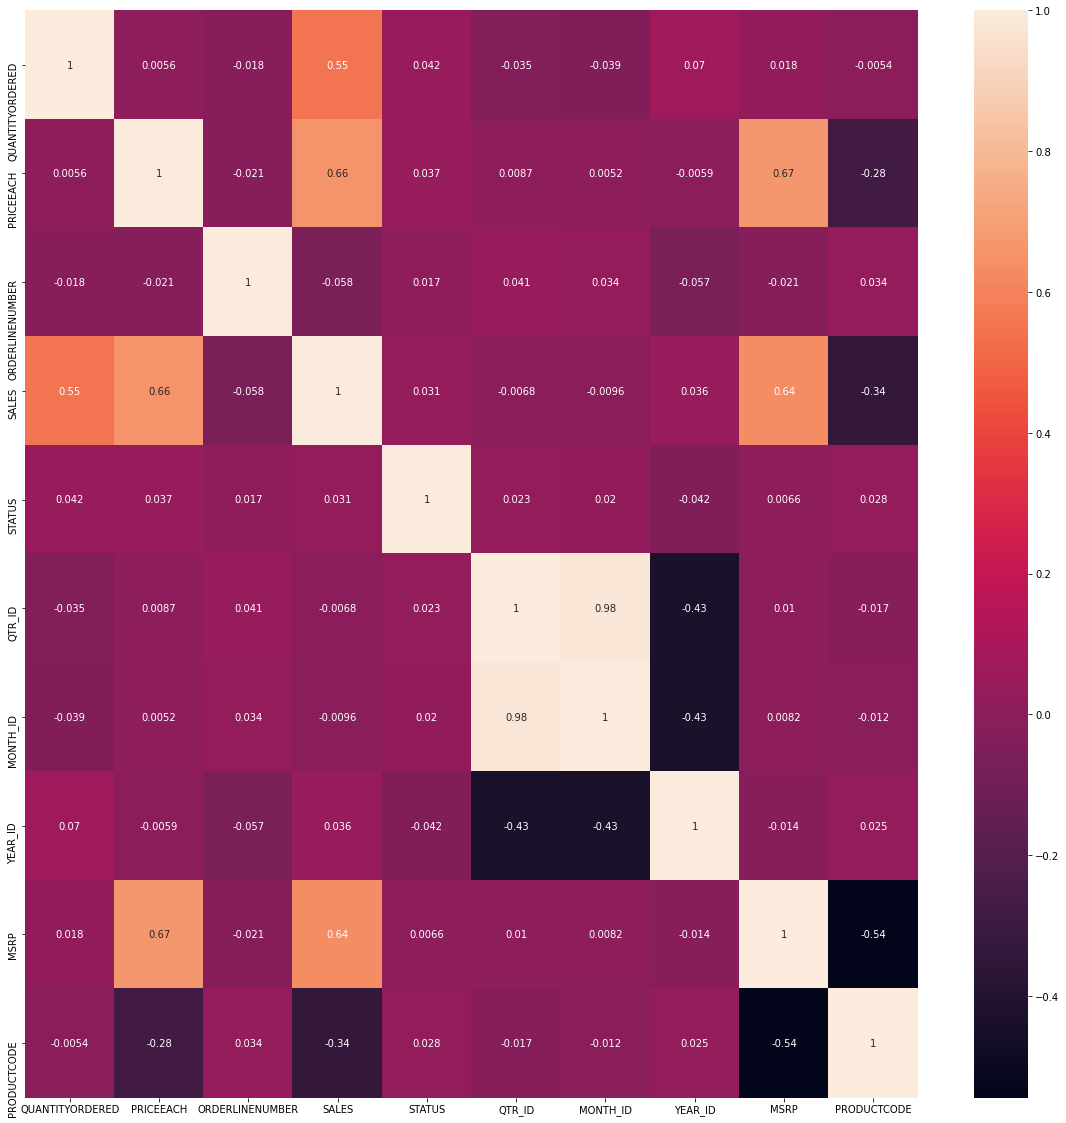

In [26]:
plt.figure(figsize = (20, 20))
corr_matrix = df.iloc[:, :10].corr()
sns.heatmap(corr_matrix, annot=True);

#### OBESRVATIONS

- There is a high co-relation in Quarter ID and the monthly IDs
- MSRP is +velly correlated to PRICEEACH and SALES
- PRODUCTCODE is -velly correlated with MSRP, PRICEEACH and SALES
- +ve correlation btw SALES, PRICEEACH, QUANTITYORDERED

In [27]:
# It looks like the Quarter ID and the monthly IDs are highly correlated as they will produce nearly same results
# Let's drop 'QTR_ID' (or 'MONTH_ID') 
df.drop("QTR_ID", axis = 1, inplace = True)
df.shape

(2823, 38)

In [28]:
# Distplot shows the (1) histogram, (2) kde plot and (3) rug plot.
# (1) Histogram: it's a graphical display of data using bars with various heights. Each bar groups numbers into ranges and taller bars show that more data falls in that range.
# (2) Kde Plot: Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable.
# (3) Rug plot: plot of data for a single quantitative variable, displayed as marks along an axis (one-dimensional scatter plot). 
import plotly.figure_factory as ff

#fig = plt.figure(figsize=(10,10));
for i in range(8):
    if df.columns[i]!='ORDERLINENUMBER':
        fig = ff.create_distplot([df[df.columns[i]].apply(lambda x: float(x))], ['distplot']);
        fig.update_layout(title_text=df.columns[i]);
        fig.show();

In [29]:
# Visualize the relationship between variables using pairplots

fig = px.scatter_matrix(df, 
                        dimensions=df.columns[:8], color='MONTH_ID')# fill color by months
fig.update_layout(title_text='Sales Data',
                  width=1100,
                  height=1100
                 )
fig.show()

#### OBESRVATIONS

+ A trend exists between 'SALES' and 'QUANTITYORDERED'
+ A trend exists between 'MSRP' and 'PRICEEACH' (there are some outlaiers)
+ A trend exists between 'PRICEEACH' and 'SALES'
+ It seems that sales growth exists as we move from 2013 to 2014 to 2015 ('SALES' vs. 'YEAR_ID')

## 3: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [30]:
from sklearn.preprocessing import StandardScaler, normalize
# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

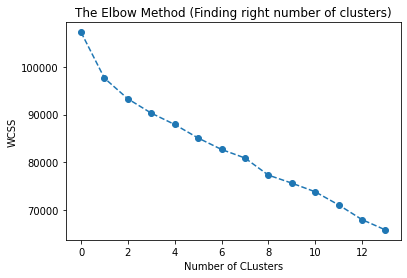

In [31]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_) # intertia is the Sum of squared distances of samples to their closest cluster center (WCSS)

plt.plot(wcss, marker='o', linestyle='--')
plt.title('The Elbow Method (Finding right number of clusters)')
plt.xlabel('Number of CLusters')
plt.ylabel('WCSS')
plt.show()

From this we can observe that, 5th cluster seems to be forming the elbow of the curve. after that we will apply auto encoders to solve this problem

In [32]:
#applying k-means with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(df_scaled)
labels = kmeans.labels_
labels

array([0, 0, 2, ..., 2, 0, 2], dtype=int32)

In [33]:
kmeans.cluster_centers_.shape

(5, 38)

In [34]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=df.columns)
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
0,-0.458307,-0.737854,0.050189,-0.811300,-0.036383,0.002505,-0.008891,-0.588435,0.284537,-0.154224,0.026592,0.081947,0.035730,0.070195,-0.044979,0.077293,-0.242672,-0.980703,1.096370,0.034997,-0.012596,-0.108756,0.027240,-0.009132,0.002676,0.015584,0.004218,0.010442,0.050869,0.030941,0.003133,-0.003550,0.011243,0.009334,-0.143553,-0.035726,0.021069,-0.010118
1,1.264271,0.800092,-0.261504,2.581716,0.104039,-0.085287,0.144435,1.412341,-0.861488,0.569706,0.016566,-0.161898,-0.300637,-0.127846,-0.199144,-0.146484,4.120788,-0.980703,-0.912100,-0.082322,0.045752,-0.108756,-0.117969,0.110980,-0.001866,0.077142,0.026228,0.096382,0.026185,0.006951,0.012571,-0.028876,-0.013206,-0.035153,-0.143553,-0.105371,-0.114551,0.119599
2,0.284292,0.579951,-0.001899,0.453377,-0.022757,-0.003210,-0.021999,0.377193,-0.160239,0.092410,-0.009018,-0.043353,-0.034988,-0.057333,0.061355,-0.066757,-0.242672,1.019676,-0.912100,-0.005084,0.015854,-0.108756,-0.000853,0.005770,0.010082,0.000417,0.003132,-0.015764,-0.036441,-0.020266,0.007492,0.013120,0.002523,0.020395,-0.143553,0.052404,0.009339,0.045495
3,-0.261543,0.190162,-0.354187,-0.145888,-0.600695,-0.381699,0.524237,0.008588,0.135762,-0.466392,-0.364452,-0.251198,0.908334,0.390660,-0.345470,0.509262,-0.242672,-0.071440,0.183429,-0.264819,-0.140961,9.194860,-0.159458,-0.151083,-0.183541,-0.353765,-0.149852,-0.075499,-0.204199,-0.136988,-0.176195,-0.096414,-0.169676,-0.371278,-0.143553,-0.105371,-0.231843,-0.742934
4,0.010285,0.152186,-0.131095,0.070903,1.390531,0.473773,0.013539,0.101390,-0.164484,-0.093345,-0.200857,-0.179374,0.335664,-0.059748,0.279807,-0.010937,-0.089568,0.107222,-0.066429,-0.264819,-0.140961,-0.108756,-0.159458,-0.151083,-0.183541,-0.353765,-0.149852,-0.075499,-0.204199,-0.136988,-0.176195,-0.096414,-0.169676,-0.371278,6.966083,-0.105371,-0.231843,-0.742934


In [35]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=df.columns)
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
0,30.629032,68.775508,6.678226,2059.849323,1.000806,7.101613,2003.808871,77.071774,62.758871,0.269355,1.258065e-01,0.133871,9.274194e-02,0.038710,9.274194e-02,0.246774,1.387779e-17,-1.054712e-15,1.000000e+00,7.419355e-02,1.774194e-02,2.151057e-16,2.903226e-02,2.096774e-02,3.306452e-02,1.161290e-01,2.258065e-02,6.451613e-03,5.000000e-02,2.258065e-02,3.064516e-02,8.870968e-03,2.983871e-02,1.241935e-01,7.979728e-17,7.258065e-03,5.564516e-02,3.508065e-01
1,47.406452,99.796968,5.361290,8308.219097,1.038710,6.780645,2003.916129,157.464516,26.567742,0.612903,1.225806e-01,0.058065,-1.110223e-16,0.006452,4.516129e-02,0.154839,1.000000e+00,-7.771561e-16,1.110223e-15,4.516129e-02,2.580645e-02,-2.081668e-17,6.451613e-03,3.870968e-02,3.225806e-02,1.354839e-01,2.580645e-02,1.290323e-02,4.516129e-02,1.935484e-02,3.225806e-02,6.451613e-03,2.580645e-02,1.096774e-01,3.122502e-17,4.336809e-17,2.580645e-02,4.129032e-01
2,37.861734,95.356570,6.458146,4388.800374,1.004484,7.080717,2003.799701,115.871450,48.713004,0.386398,1.143498e-01,0.094918,7.324365e-02,0.017937,1.255605e-01,0.187593,-3.677614e-16,1.000000e+00,-8.437695e-15,6.427504e-02,2.167414e-02,2.359224e-16,2.466368e-02,2.316891e-02,3.437967e-02,1.113602e-01,2.242152e-02,4.484305e-03,3.288490e-02,1.569507e-02,3.139013e-02,1.046338e-02,2.840060e-02,1.278027e-01,1.630640e-16,1.644245e-02,5.306428e-02,3.774290e-01
3,32.545455,87.494242,4.969697,3285.230909,0.848485,5.696970,2004.181818,101.060606,58.060606,0.121212,5.551115e-17,0.030303,3.333333e-01,0.090909,5.551115e-17,0.424242,4.857226e-17,4.545455e-01,5.454545e-01,1.387779e-17,1.040834e-17,1.000000e+00,6.938894e-18,1.387779e-17,-2.081668e-17,5.551115e-17,1.040834e-17,8.673617e-19,2.081668e-17,-1.040834e-17,-6.938894e-18,-3.469447e-18,-1.387779e-17,2.775558e-17,0.000000e+00,-3.469447e-18,-2.775558e-17,5.551115e-17
4,35.192982,86.728246,5.912281,3684.459825,1.385965,8.824561,2003.824561,104.789474,48.578947,0.298246,5.263158e-02,0.052632,1.754386e-01,0.017544,1.929825e-01,0.210526,3.508772e-02,5.438596e-01,4.210526e-01,1.387779e-17,1.387779e-17,5.204170e-18,0.000000e+00,1.387779e-17,1.387779e-17,8.326673e-17,3.469447e-17,-1.734723e-18,-6.938894e-18,-2.081668e-17,2.081668e-17,-8.673617e-18,3.469447e-18,-4.163336e-17,1.000000e+00,-3.469447e-18,2.775558e-17,-1.665335e-16


In [36]:
df['ORDERLINENUMBER'] = df['ORDERLINENUMBER'].apply(lambda x: float(x))

In [37]:
# Add a label (which cluster) corresponding to each data point
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,cluster
0,30,95.70,2.0,2871.00,1,2,2003,95,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,34,81.35,5.0,2765.90,1,5,2003,95,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,41,94.74,2.0,3884.34,1,7,2003,95,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2
3,45,83.26,6.0,3746.70,1,8,2003,95,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
4,49,100.00,14.0,5205.27,1,10,2003,95,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15.0,2244.40,1,12,2004,54,108,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2819,29,100.00,1.0,3978.51,1,1,2005,54,108,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2820,43,100.00,4.0,5417.57,0,3,2005,54,108,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
2821,34,62.24,1.0,2116.16,1,3,2005,54,108,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


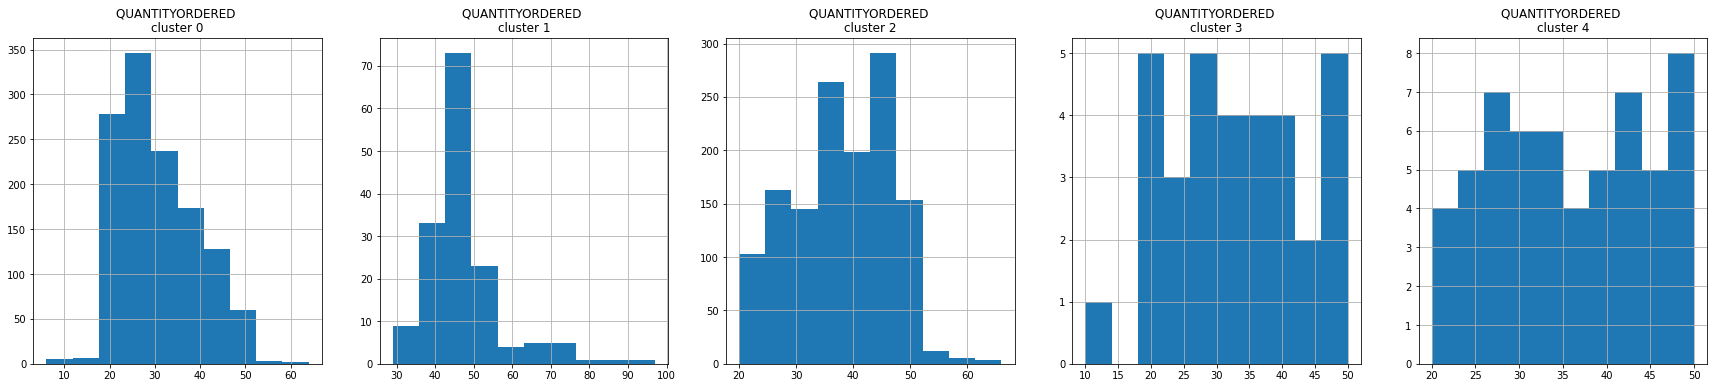

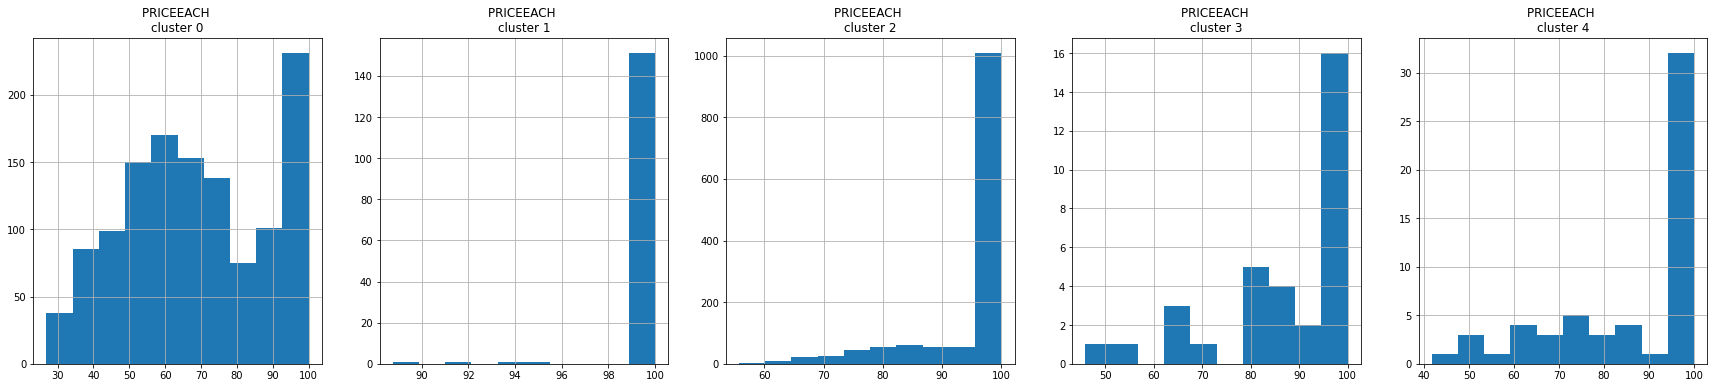

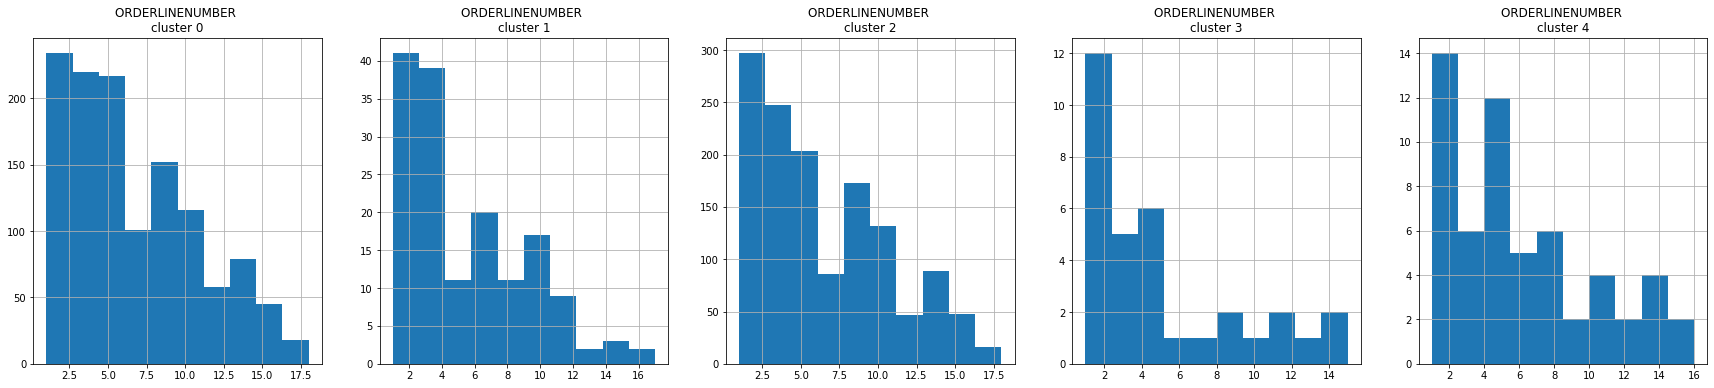

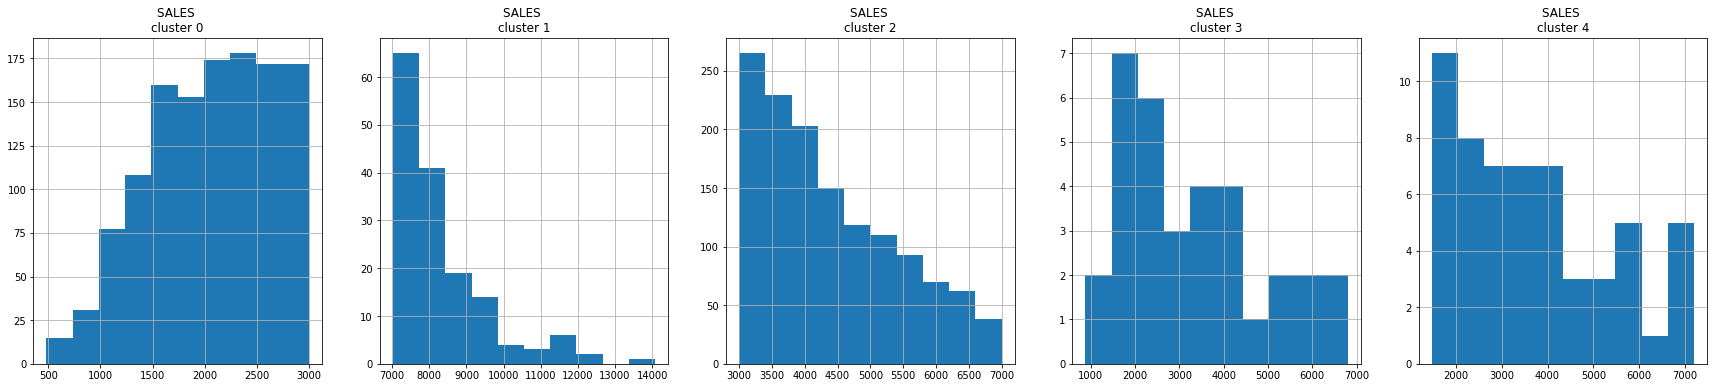

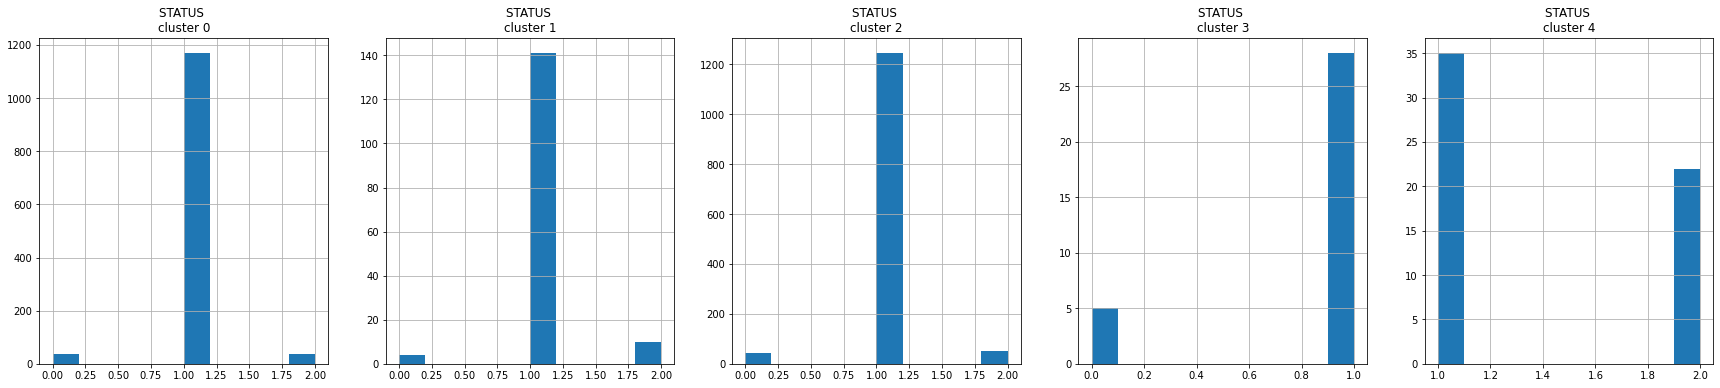

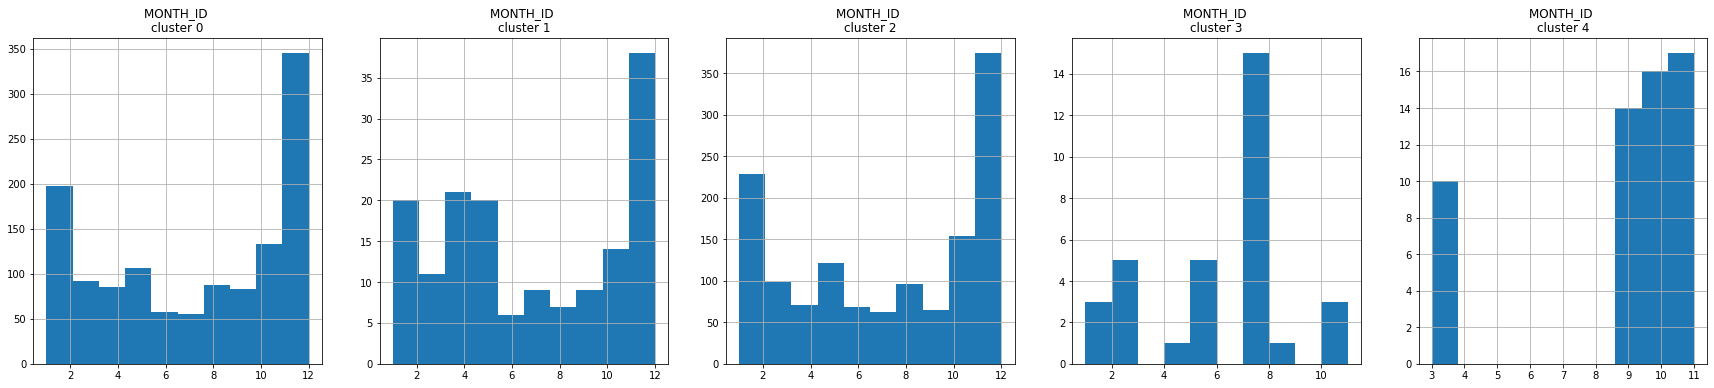

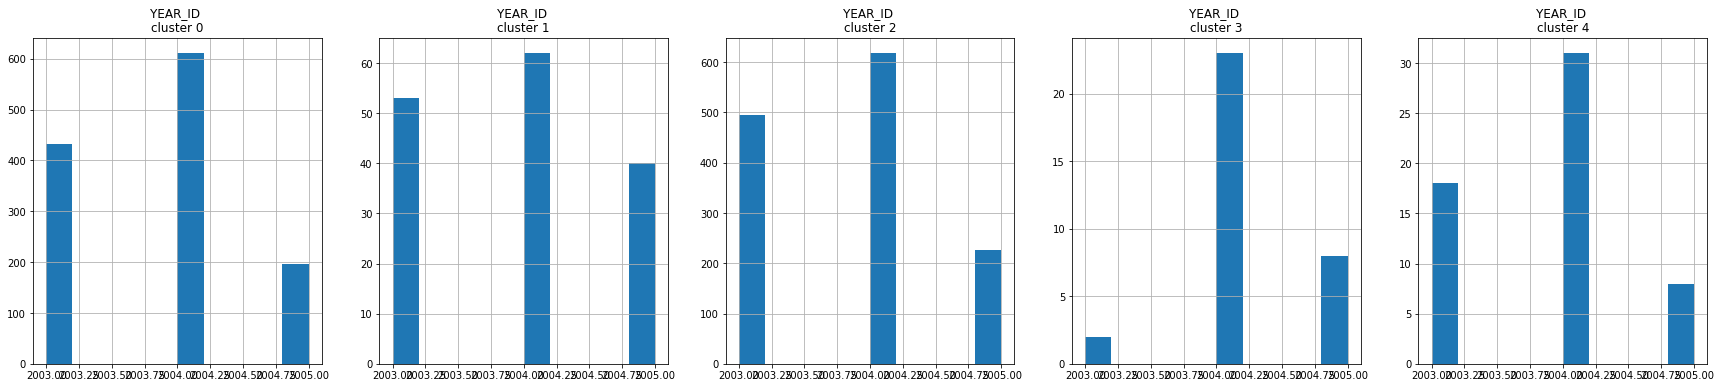

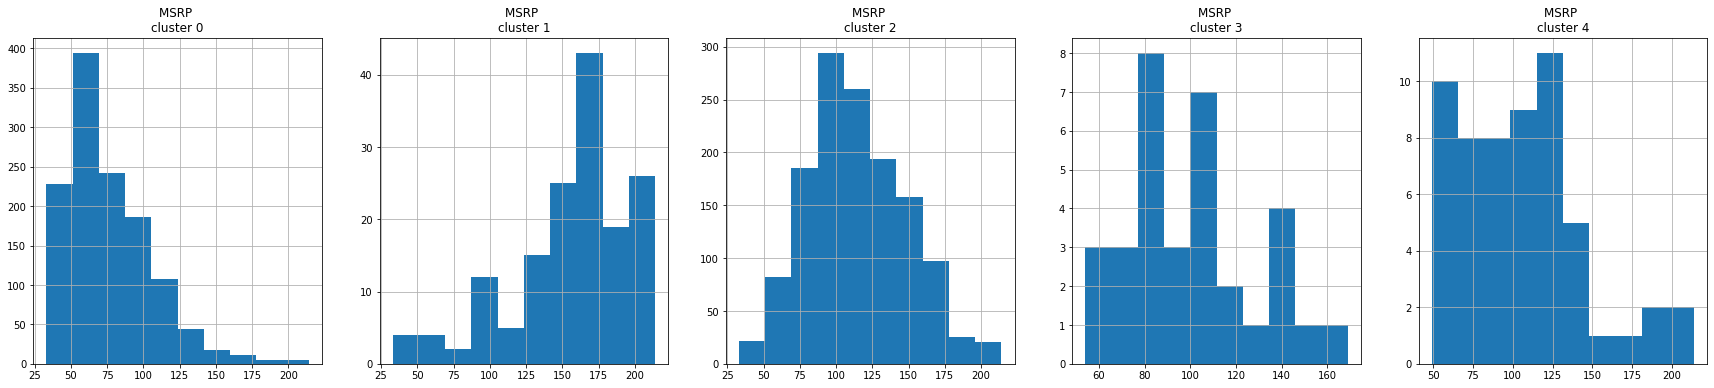

In [38]:
# plot histogram for each feature based on cluster 
for i in df.columns[:8]:
    plt.figure(figsize=(30,6))
    for j in range(5):
        plt.subplot(1,5,j+1)
        cluster = df_cluster[df_cluster['cluster']==j]
        cluster[i].hist()
        plt.title('{} \ncluster {}'.format(i,j))
plt.show()

### OBERSVATIONS:

- CLUSTER 0 (highest) - customer in this group buy item in high quantity, price of each item ~ 99, they also corresponds to highest total sales of ~ 8293. They are the highest buyers of products with high MSRP ~158.
- CLUSTER 1 - This cluster is nearly close to cluster 4 with MSRP around 94 and average quantity ordered ~34, average piced ~ 83 and sales to 3169
- CLUSTER 2 (lowest) - This group represents customers who buy items in varying quantity ~30, they tend to low price items ~68. Their sales is ~ 2061, they buy products with lowert MSRP of ~62.
- CLUSTER 3 - This is the second highest cluster, this group buy in medium quantity ~38, wwith total sales upto ~ 4405 with average price of ~ 95. The MSRP is around 115
- CLUSTER 4 - This group represents customers who are only active during the holidays. they buy in lower quantity ~35, but they tend to buy average price items around ~87. They also correspond to lower total sales around ~3797, they tend to buy items with MSRP around 116.

NOTE: the KMeans result in the final (save version run) might be different with cluster number and values, but the obervations will be simillar

## APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-0.48654365, -1.16839369,  0.8326454 ],
       [-0.78630381, -0.99154157,  1.50451697],
       [ 1.42995447,  0.15213036,  0.49984822],
       ...,
       [ 0.33914988,  3.89425954,  0.66632502],
       [-2.78954536,  2.36655645,  1.60535303],
       [-0.65303136,  3.52653021, -1.28615531]])

In [40]:
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1', 'pca2', 'pca3'])
pca_df.head()

,pca1,pca2,pca3
0,-0.486544,-1.168394,0.832645
1,-0.786304,-0.991542,1.504517
2,1.429954,0.152130,0.499848
3,1.288731,-0.166670,-0.670240
4,1.976705,-0.064124,-1.170980


In [41]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,pca3,cluster
0,-0.486544,-1.168394,0.832645,0
1,-0.786304,-0.991542,1.504517,0
2,1.429954,0.152130,0.499848,2
3,1.288731,-0.166670,-0.670240,2
4,1.976705,-0.064124,-1.170980,2


In [42]:
fig = px.scatter_3d(pca_df, x='pca1', y='pca2', z='pca3', 
                    color='cluster', symbol='cluster', size_max=18, opacity=0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

 ## APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)
- auto encoders are a type of Artificial Neural Netwirk that are used to perform data encoding or representation learning
- auto encoders use the input and give the same output
- auto encoders works by adding a bottle neck in network
- this bottleneck g]forces the network to create a compressed (encoded) version of the original input
- auto encoders works well if there is correlation between inputs

In [43]:
df.shape

(2823, 38)

In [45]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import *
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [46]:
input_df = Input(shape = (38,))
x = Dense(50, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
encoded = Dense(8, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
decoded = Dense(38, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

# encoder - used for dimensionality reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss='mean_squared_error')

In [48]:
autoencoder.fit(df, df, batch_size=128, epochs=500, verbose=3)

Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78

In [52]:
encoded_df = autoencoder.predict(df_scaled)

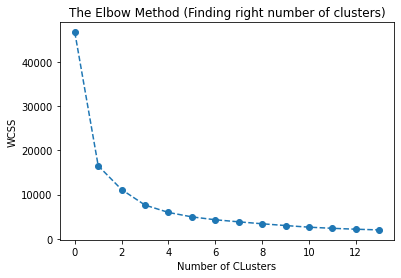

In [53]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(encoded_df)
    wcss.append(kmeans.inertia_) # intertia is the Sum of squared distances of samples to their closest cluster center (WCSS)

plt.plot(wcss, marker='o', linestyle='--')
plt.title('The Elbow Method (Finding right number of clusters)')
plt.xlabel('Number of CLusters')
plt.ylabel('WCSS')
plt.show()

In [55]:
# from the above layer 3 clusters seems best choice
kmeans = KMeans(3)
kmeans.fit(encoded_df)
labels = kmeans.labels_
y = kmeans.fit_predict(df_scaled)

In [57]:
df_cluster_dr = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,cluster
0,30,95.70,2.0,2871.00,1,2,2003,95,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,34,81.35,5.0,2765.90,1,5,2003,95,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,41,94.74,2.0,3884.34,1,7,2003,95,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2
3,45,83.26,6.0,3746.70,1,8,2003,95,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
4,49,100.00,14.0,5205.27,1,10,2003,95,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2


In [58]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
0,30.556872,68.786888,6.659558,2054.559479,1.003160,7.129542,2003.805687,76.131122,63.419431,0.255924,0.123223,0.132701,1.003160e-01,0.039494,0.093997,0.254344,-9.020562e-17,-1.054712e-15,1.000000e+00,0.071880,0.016588,0.014218,0.028436,0.020537,0.031596,0.112954,0.022117,0.006319,0.048973,0.022117,0.028436,0.008689,0.029226,0.120063,0.017378,4.739336e-03,0.054502,0.341232
1,37.838400,98.633088,6.262400,5572.012576,1.022400,7.212800,2003.780800,148.124800,28.652800,0.886400,0.046400,0.016000,1.165734e-15,0.001600,0.011200,0.038400,2.496000e-01,7.248000e-01,2.560000e-02,0.044800,0.038400,0.006400,0.014400,0.035200,0.040000,0.099200,0.040000,0.008000,0.024000,0.014400,0.041600,0.017600,0.028800,0.104000,0.017600,4.000000e-02,0.041600,0.344000
2,39.413090,93.817800,6.340129,4237.176706,1.012876,6.961373,2003.850858,102.317597,57.516094,0.095494,0.156652,0.137339,1.148069e-01,0.027897,0.187768,0.280043,1.072961e-03,9.989270e-01,-4.329870e-15,0.070815,0.010730,0.011803,0.026824,0.016094,0.028970,0.116953,0.009657,0.003219,0.038627,0.016094,0.024678,0.004292,0.025751,0.134120,0.025751,8.847090e-17,0.052575,0.383047


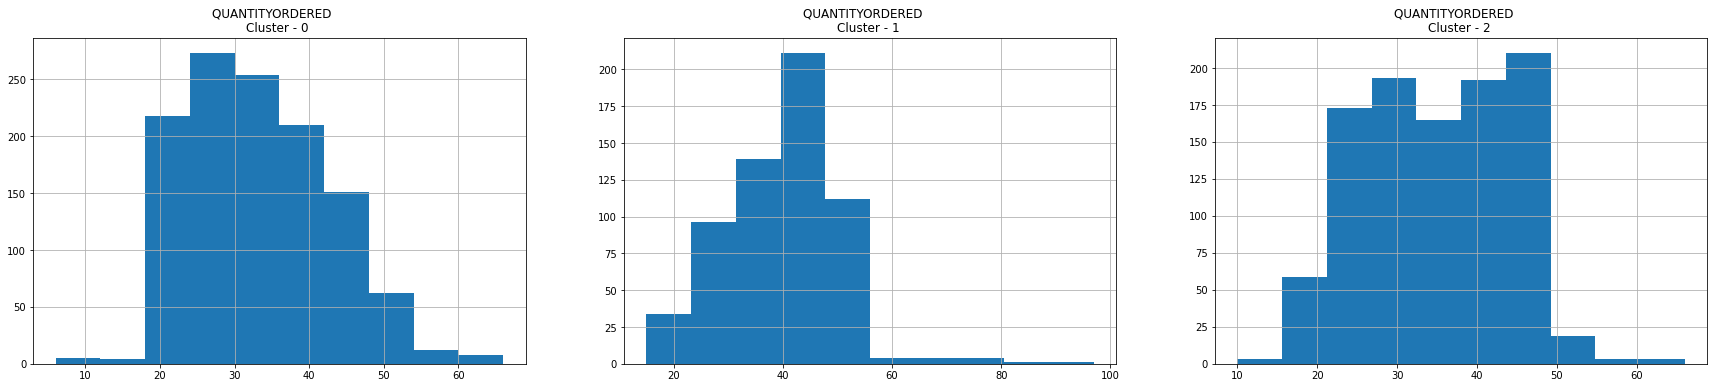

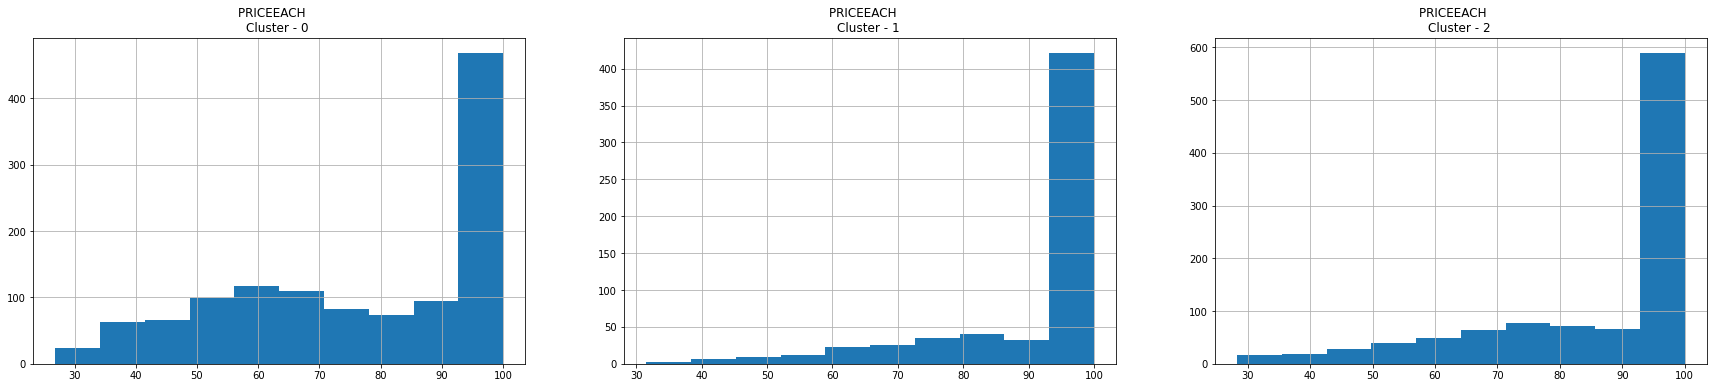

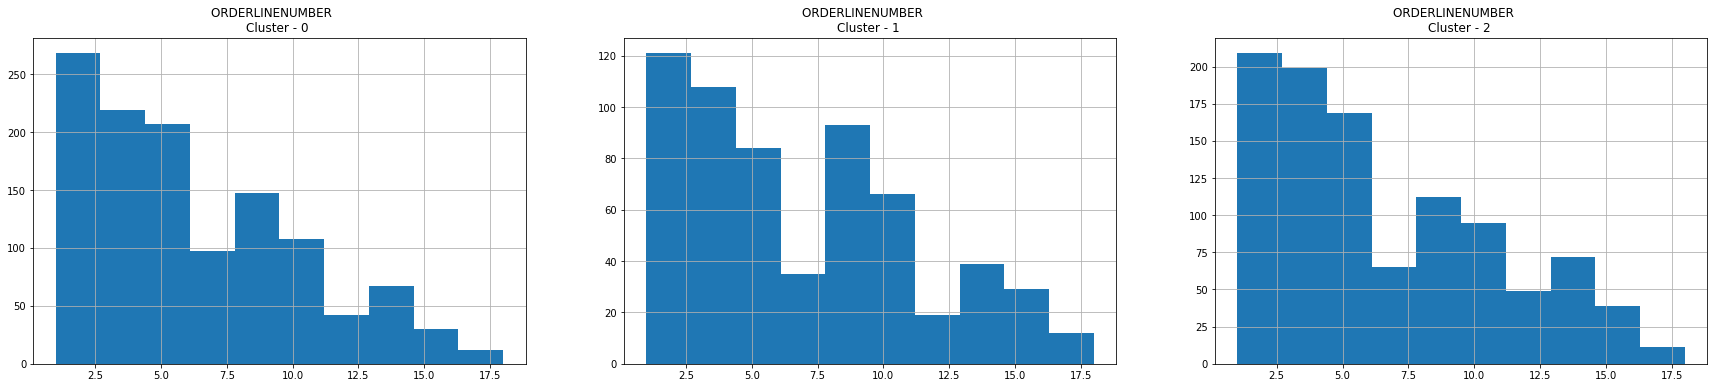

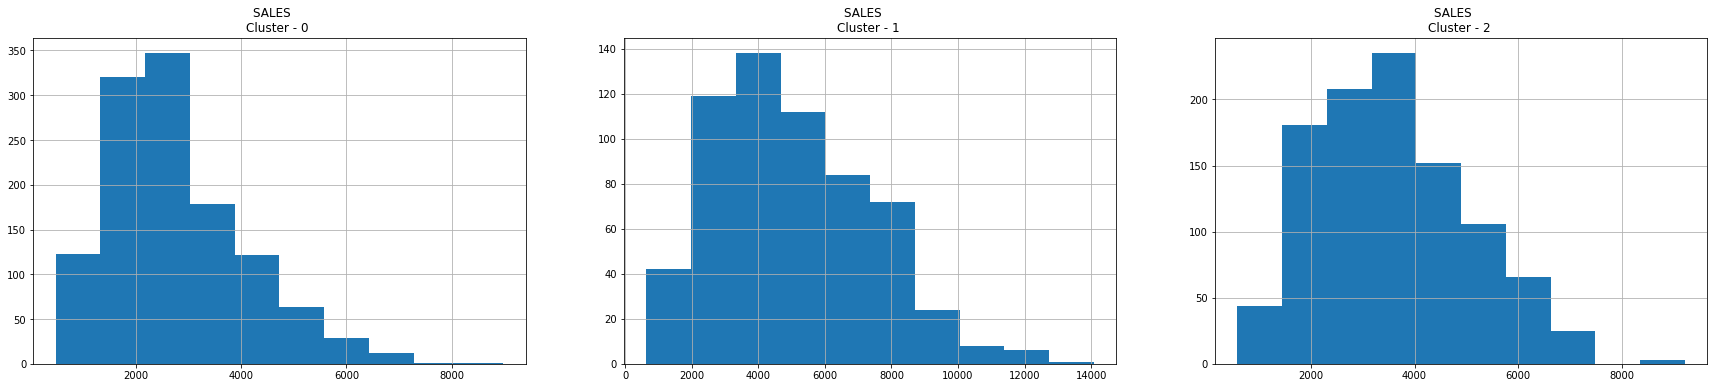

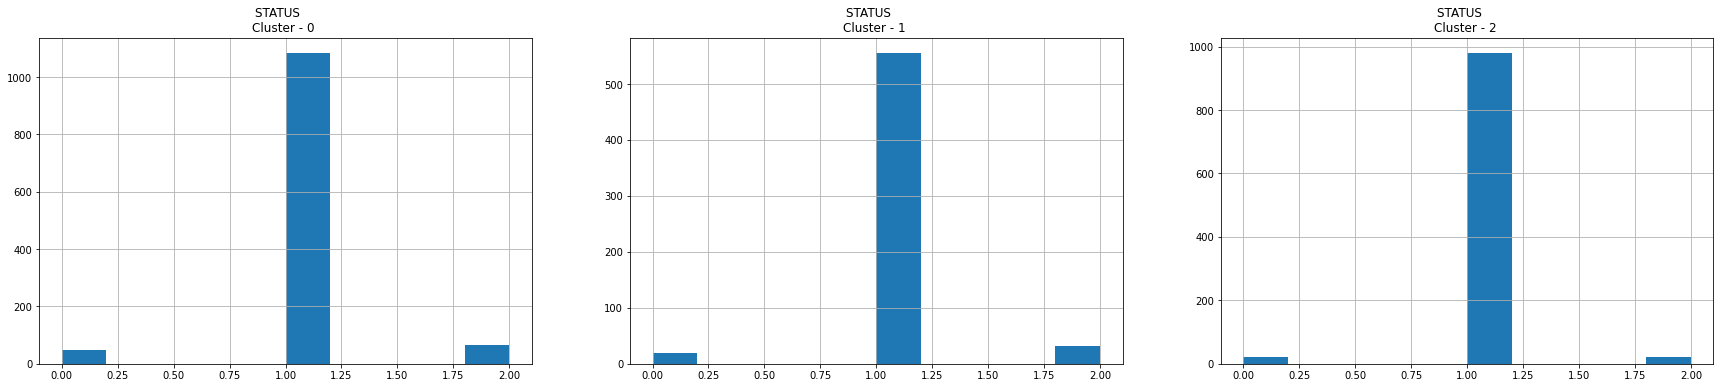

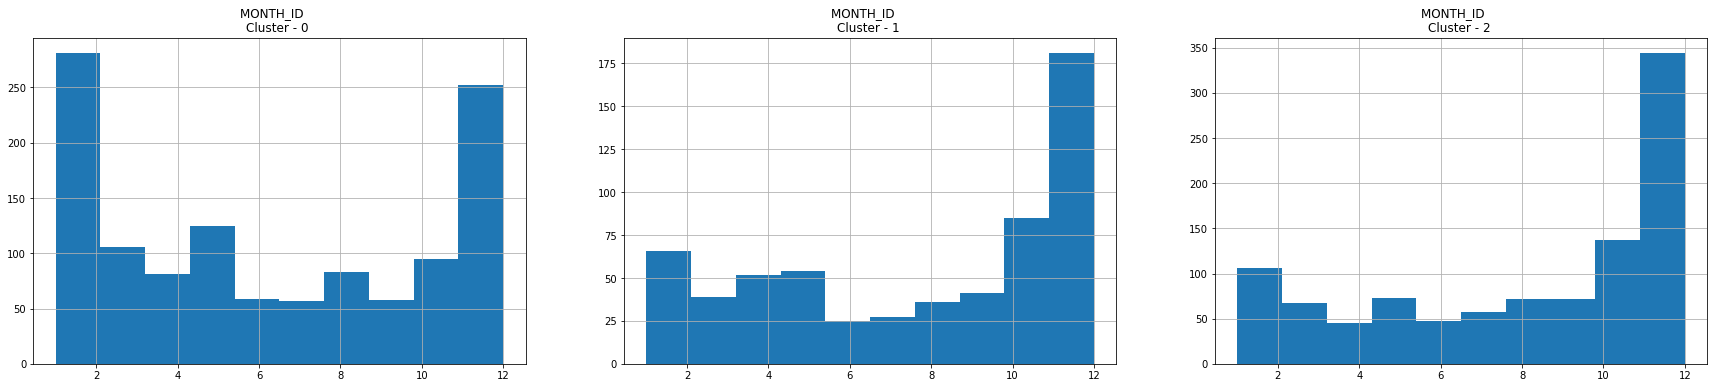

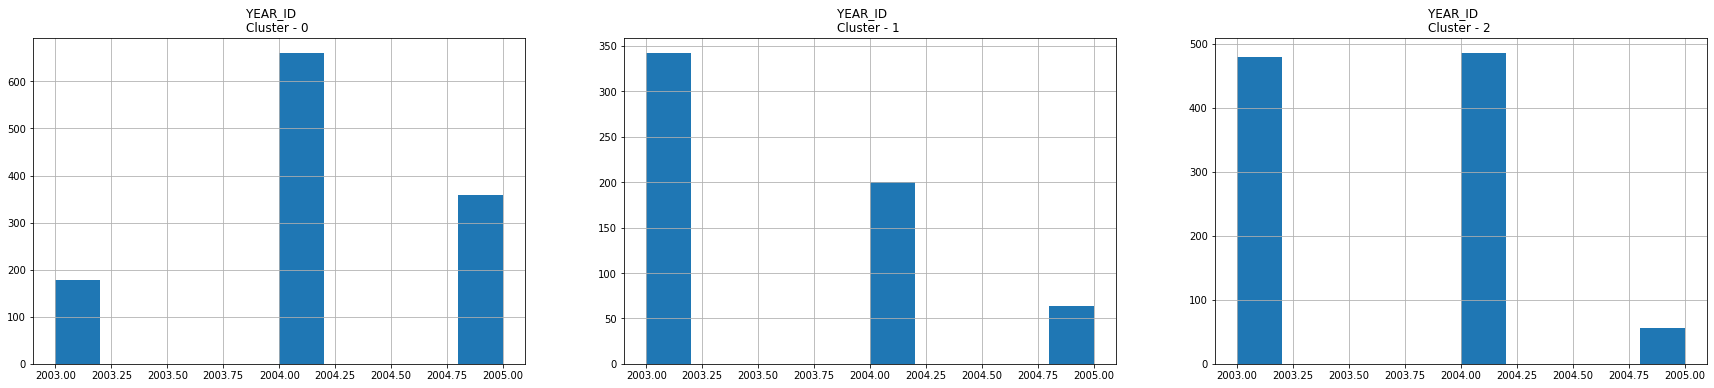

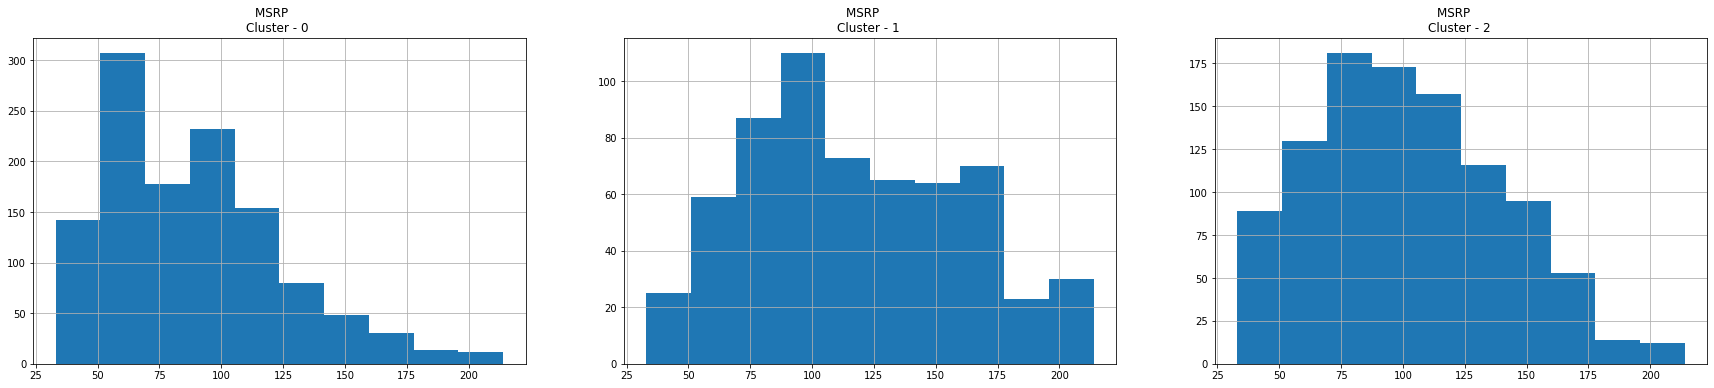

In [60]:
# plot histogram for each feature based on cluster 
for i in df.columns[:8]:
  plt.figure(figsize = (30, 6))
  for j in range(3):
    plt.subplot(1, 3, j+1)
    cluster = df_cluster_dr[df_cluster_dr['cluster'] == j]
    cluster[i].hist()
    plt.title('{}    \nCluster - {} '.format(i,j))
  
  plt.show()

## FINAL OBESERVATIONS:
- Cluster 0 - This group represents customers who buy items in high quantity(47), they usually buy items with high prices(99). They bring-in more sales than other clusters. They are mostly active through out the year. They usually buy products corresponding to product code 10-90. They buy products with high mrsp(158).
- Cluster 1 - This group represents customers who buy items in average quantity(37) and they buy tend to buy high price items(95). They bring-in average sales(4398) and they are active all around the year.They are the highest buyers of products corresponding to product code 0-10 and 90-100.Also they prefer to buy products with high MSRP(115) .
- Cluster 2 - This group represents customers who buy items in small quantity(30), they tend to buy low price items(69). They correspond to the lowest total sale(2061) and they are active all around the year.They are the highest buyers of products corresponding to product code 0-20 and 100-110 they then to buy products with low MSRP(77).

In [62]:
# Reduce the original data to 3 dimension using PCA for visualize the clusters
pca = PCA(n_components = 3)
prin_comp = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2', 'pca3'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,pca3,cluster
0,-0.486437,-1.234567,0.883233,0
1,-0.786389,-1.077387,1.457785,0
2,1.429760,0.119503,0.415193,2
3,1.288752,-0.204041,-0.668859,2
4,1.976785,-0.119666,-1.168682,2


In [63]:
# Visualize clusters using 3D-Scatterplot
fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3',
              color='cluster', symbol = 'cluster', size_max = 10, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))